In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [901]:
import tensorflow as tf
from tensorflow import keras
keras.backend.clear_session()
tf.compat.v1.reset_default_graph()
del vrnn
del model
tf.random.set_seed(24)

In [4]:
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt
import numpy as np

arparams = np.array([1.0])
maparams = np.array([1.0])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams]
arma_process = ArmaProcess(ar, ma)
sample = arma_process.generate_sample(nsample=1000)



In [295]:
import pickle as pkl

with open('AR3_run1/training_data.pkl', 'wb') as f:
    pkl.dump(sample,f)

In [5]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
m_sample = mm.fit_transform(np.reshape(sample, (-1,1)))
m_sample = np.ndarray.flatten(m_sample)

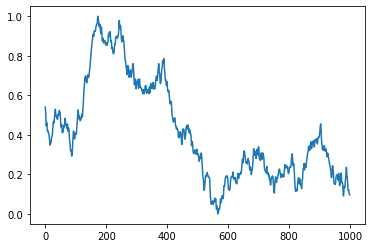

In [6]:
plt.plot(m_sample)

In [849]:
window = 100
train = np.asarray([m_sample[i:i+window] for i in range(len(sample) - window + 1)])[:,:,np.newaxis]

In [902]:
from vrnngan2 import VRNNGRU
import os
from tensorflow import keras
keras.backend.clear_session()
timesteps = train.shape[1]
feature_space = train.shape[2]
z_dim = 32
hidden_dim = 64
vrnn = VRNNGRU(feature_space, z_dim, hidden_dim, timesteps)
vrnn.compile(keras.optimizers.Adam(lr=0.001))
vrnn.fit(train, train, batch_size= 20, epochs=10)

/mnt/c/Users/jchle/Work/Thesis/VAECJ/bash_venv/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/10
46/46 [==============================] - 9s 74ms/step - total_loss: -9.6026 - loss: -10.7225 - kl: 0.3192
Epoch 2/10
46/46 [==============================] - 3s 75ms/step - total_loss: -20.0328 - loss: -13.3878 - kl: 0.0216
Epoch 3/10
46/46 [==============================] - 3s 74ms/step - total_loss: -48.7665 - loss: -43.8939 - kl: 0.0467
Epoch 4/10
46/46 [==============================] - 4s 76ms/step - total_loss: -68.4455 - loss: -63.1901 - kl: 0.0046
Epoch 5/10
46/46 [==============================] - 3s 74ms/step - total_loss: -83.2582 - loss: -81.2421 - kl: 0.0031
Epoch 6/10
46/46 [==============================] - 3s 73ms/step - total_loss: -85.1908 - loss: -84.7710 - kl: 0.0069
Epoch 7/10
46/46 [==============================] - 4s 78ms/step - total_loss: -85.2165 - loss: -85.0002 - kl: 0.0020
Epoch 8/10
46/46 [==============================] - 4s 82ms/step - total_loss: -84.3707 - loss: -84.1746 - kl: 0.0044
Epoch 9/10
46/46 [==============================] - 4s 80

In [904]:
from importlib import reload
import vrnngan2
vrnngan = reload(vrnngan2)

In [ ]:
from vrnngan2 import VRNNGRUGAN, lagCallback
from tensorflow import keras
import os

timesteps = train.shape[1]
feature_space = train.shape[2]
z_dim = 32
hidden_dim = 64
model = VRNNGRUGAN(feature_space, z_dim, hidden_dim, timesteps, 20.0, vrnn)
model.compile(keras.optimizers.Adam(lr=0.001), keras.optimizers.Adam(lr=0.0001))
model.fit(train, train, batch_size= 20, epochs=200)

Epoch 1/200


In [895]:
model.fit(train, train, batch_size= 20, epochs=200)

Epoch 1/200
46/46 [==============================] - 5s 100ms/step - total_loss: -234.9000 - loss: -236.5990 - kl: 0.0026 - discrim_loss: 0.6359 - discrim_loss_fake: 0.3105 - discrim_loss_real: 0.3246
Epoch 2/200
46/46 [==============================] - 5s 100ms/step - total_loss: -240.5088 - loss: -242.5775 - kl: 0.0021 - discrim_loss: 0.6647 - discrim_loss_fake: 0.3356 - discrim_loss_real: 0.3270
Epoch 3/200
46/46 [==============================] - 5s 100ms/step - total_loss: -233.5245 - loss: -237.8491 - kl: 0.0021 - discrim_loss: 0.6359 - discrim_loss_fake: 0.3309 - discrim_loss_real: 0.3250
Epoch 4/200
46/46 [==============================] - 5s 101ms/step - total_loss: -234.1350 - loss: -235.0474 - kl: 0.0028 - discrim_loss: 0.6088 - discrim_loss_fake: 0.2924 - discrim_loss_real: 0.3115
Epoch 5/200
46/46 [==============================] - 5s 99ms/step - total_loss: -239.7569 - loss: -234.3389 - kl: 0.0021 - discrim_loss: 0.6305 - discrim_loss_fake: 0.2913 - discrim_loss_real: 0.3

46/46 [==============================] - 5s 99ms/step - total_loss: -239.6324 - loss: -238.4429 - kl: 0.0101 - discrim_loss: 0.6308 - discrim_loss_fake: 0.2942 - discrim_loss_real: 0.3327
Epoch 42/200
46/46 [==============================] - 5s 98ms/step - total_loss: -231.5077 - loss: -229.6277 - kl: 0.1178 - discrim_loss: 0.6151 - discrim_loss_fake: 0.3305 - discrim_loss_real: 0.2967
Epoch 43/200
46/46 [==============================] - 4s 97ms/step - total_loss: -234.1681 - loss: -239.3007 - kl: 0.0276 - discrim_loss: 0.6549 - discrim_loss_fake: 0.3063 - discrim_loss_real: 0.3252
Epoch 44/200
46/46 [==============================] - 5s 101ms/step - total_loss: -230.0576 - loss: -235.4134 - kl: 0.0021 - discrim_loss: 0.6315 - discrim_loss_fake: 0.3003 - discrim_loss_real: 0.3327
Epoch 45/200
46/46 [==============================] - 5s 102ms/step - total_loss: -207.3325 - loss: -226.2261 - kl: 0.0029 - discrim_loss: 0.5992 - discrim_loss_fake: 0.3175 - discrim_loss_real: 0.3057
Epoch 

KeyboardInterrupt: 

In [263]:
vrnn.save_weights('AR3_run1/generator')

In [69]:
model.save_weights('AR3_run1/gan')

In [764]:
outputs, z, q_mu, p_mu, q_logvar, p_logvar, output_mean, output_logvar,_ = model.predict(train)

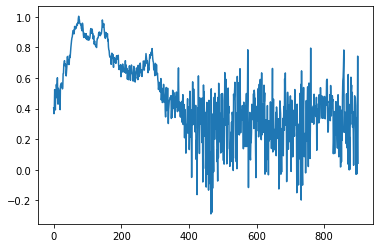

In [765]:
plt.plot(outputs[:,-1,:])

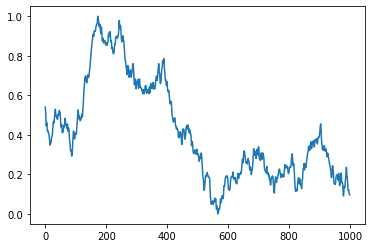

In [766]:
plt.plot(m_sample)

In [898]:
state = None
results = []
inp = np.reshape(m_sample[0], (1,1))

for i in range(1000):
    outputs, state = vrnn.vrnn_cell(inp, state, inference=False)
    state=[state]
    results.append(outputs[0].numpy())
results = [x[0][0] for x in results]

(-0.1, 1.0)

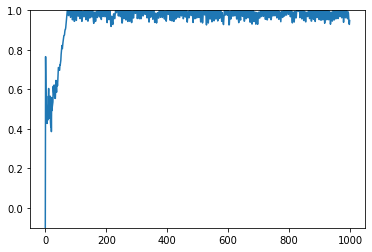

In [899]:
plt.plot(results)
plt.ylim([-0.1,1])

In [900]:
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg

arma_est = sm.tsa.ARIMA(results, order=(1,0,1), trend='n').fit()

In [888]:
arma_est.params

array([ 0.99976887, -0.54457328,  0.00126307])